In [1]:
# Add Matplotlib 
%matplotlib inline
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime

In [2]:
# Files to load
city_data_to_load = os.path.join('..','Resources','city_data.csv')
ride_data_to_load = os.path.join('..','Resources','ride_data.csv')

In [3]:
#read csv file
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [4]:
# Merge the data sets into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [5]:
#Create summery dataframe: part 1
# total rides per city type
total_rides_per_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
#total drivers per city type
total_drivers_per_type = city_data_df.groupby(["type"]).sum()["driver_count"]
#total fares per city type
total_fares_per_type = pyber_data_df.groupby(["type"]).sum()["fare"]


In [6]:
#Create summery dataframe: part 2
#average fare per ride
avg_fare_per_ride = total_fares_per_type / total_rides_per_type

#average fare per driver
avg_fare_per_driver = total_fares_per_type / total_drivers_per_type


In [7]:
#create Summary Dataframe
summary_by_type_df = pd.DataFrame({
               "Total_Ride": total_rides_per_type,
               "Total_Drivers": total_drivers_per_type,
               "Total_Fares": total_fares_per_type,
                "Avg_Fare_per_Ride": avg_fare_per_ride,
                "Avg_Fare_per_Driver": avg_fare_per_driver
               })

# Remove the index name.
summary_by_type_df.index.name = None



In [8]:
#format summary dataframe
summary_by_type_df['Total_Ride'] = summary_by_type_df['Total_Ride'].map("{:,.0f}".format)

summary_by_type_df['Total_Drivers'] = summary_by_type_df['Total_Drivers'].map("{:,.0f}".format)

summary_by_type_df['Total_Fares'] = summary_by_type_df['Total_Fares'].map("${:,.2f}".format)

summary_by_type_df['Avg_Fare_per_Ride'] = summary_by_type_df['Avg_Fare_per_Ride'].map("${:.2f}".format)

summary_by_type_df['Avg_Fare_per_Driver'] = summary_by_type_df['Avg_Fare_per_Driver'].map("${:.2f}".format)


In [9]:
summary_by_type_df

,Total_Ride,Total_Drivers,Total_Fares,Avg_Fare_per_Ride,Avg_Fare_per_Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [10]:
#Part2

In [11]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
#rename columns
pyber_data_df = pyber_data_df.rename(columns={'city': 'City', 'date': 'Date','fare': 'Fare', 'ride_id': 'Ride Id', 'driver_count': 'No. Drivers', 'type': 'City Type'})

In [13]:
pyber_data_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [14]:
#set date as index
pyber_data_df.set_index(['Date'])

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [15]:
#create new dataframe for fares using copy
copy_fare_df = pyber_data_df[['Date','City Type', 'Fare']].copy()

In [16]:
copy_fare_df

,Date,City Type,Fare
0,2019-01-14 10:14:22,Urban,13.83
1,2019-03-04 18:24:09,Urban,30.24
2,2019-02-24 04:29:00,Urban,33.44
3,2019-02-10 23:22:03,Urban,23.44
4,2019-03-06 04:28:35,Urban,34.58
...,...,...,...
2370,2019-04-29 17:04:39,Rural,13.38
2371,2019-01-30 00:05:47,Rural,20.76
2372,2019-02-10 21:03:50,Rural,11.11
2373,2019-05-07 19:22:15,Rural,44.94


In [17]:
copy_fare_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2375 non-null   object 
 1   City Type  2375 non-null   object 
 2   Fare       2375 non-null   float64
dtypes: float64(1), object(2)
memory usage: 74.2+ KB


In [18]:
#change Date from String to Datetime
copy_fare_df['Date'] = pd.to_datetime(copy_fare_df['Date'])

In [19]:
copy_fare_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2375 non-null   datetime64[ns]
 1   City Type  2375 non-null   object        
 2   Fare       2375 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 74.2+ KB


In [20]:
#set index to datetime data type
copy_fare_df = copy_fare_df.set_index(['Date'])

In [21]:
copy_fare_df

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [22]:
#group sum of fares by date and city type
sum_fare_df = copy_fare_df.groupby(['Date','City Type'])['Fare'].sum()

sum_fare_df

Date                 City Type
2019-01-01 00:08:16  Urban        37.91
2019-01-01 00:46:46  Suburban     47.74
2019-01-01 02:07:24  Suburban     24.07
2019-01-01 03:46:50  Urban         7.57
2019-01-01 05:23:21  Urban        10.75
                                  ...  
2019-05-08 04:20:00  Urban        21.99
2019-05-08 04:39:49  Urban        18.45
2019-05-08 07:29:01  Urban        18.55
2019-05-08 11:38:35  Urban        19.77
2019-05-08 13:10:18  Urban        18.04
Name: Fare, Length: 2375, dtype: float64

In [23]:
#create pivot table 
pd.pivot_table(copy_fare_df, index='Date', columns='City Type', values='Fare')


City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [24]:
#create new data frame from pivot table
date_fare_pd = pd.pivot_table(copy_fare_df, index='Date', columns='City Type', values='Fare')

In [25]:
#filter new df on dates give in step 10
date_fare_pd = date_fare_pd.loc['2019-01-01 00:00:00':'2019-04-28 00:00:00']

In [26]:
date_fare_pd

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [27]:
#resample dataframe into weekly bins
#data.resample('2min').sum()
weekly_date_fare_pd = date_fare_pd.resample('W').sum()

In [28]:
weekly_date_fare_pd

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


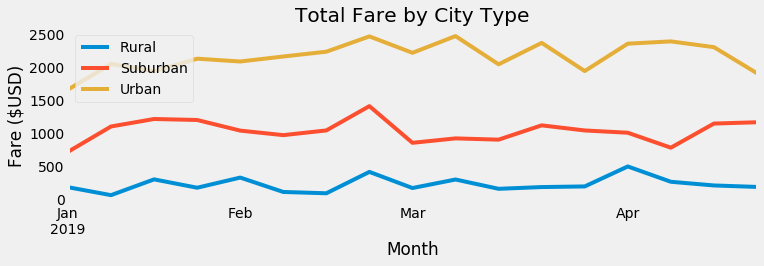

In [32]:
#create a multi-line plot 

#use style
plt.style.use('fivethirtyeight')

#graph pivot table
fig, ax = plt.subplots(figsize=(11, 3))
weekly_date_fare_pd.plot(ax=ax);

#set attributes
ax.set_title("Total Fare by City Type");
ax.set_xlabel('Month')
ax.set_ylabel('Fare ($USD)')
ax.grid()
ax.legend(loc='upper left')  

#save figure
plt.savefig("analysis/TotalFarebyCityType.png")
